In [56]:
import numpy as np
import matplotlib.pyplot as plt
from pydicom import dcmread
from scipy import ndimage
import matplotlib.patches as patches
from pydicom import dcmread
from skimage.transform import resize

In [178]:
egsinp = "/Users/simongutwein/Studium/Masterarbeit/p.egsinp"
egsphant = "/Users/simongutwein/Studium/Masterarbeit/p.egsphant"

iso_center = get_iso_center(egsphant, egsinp)
print(iso_center)

[199 185 110]
[256.   245.76  37.  ]


In [23]:
file = "/Users/simongutwein/Studium/Masterarbeit/p_plan.dcm"
plan = dcmread(file)
dose = dcmread("/Users/simongutwein/Studium/Masterarbeit/p_dose.dcm")
egs0 = np.load("/Users/simongutwein/Studium/Masterarbeit/p_0_2x2_1E07.npy")
egs90 = np.load("/Users/simongutwein/Studium/Masterarbeit/p_90_2x2_1E07.npy")
ct = np.load("/Users/simongutwein/Studium/Masterarbeit/p.npy")

In [ ]:
for i in range(110):
    print(i)
    plt.imshow(egs90[:,:,i])
    plt.show()
    plt.close()

Slice #36


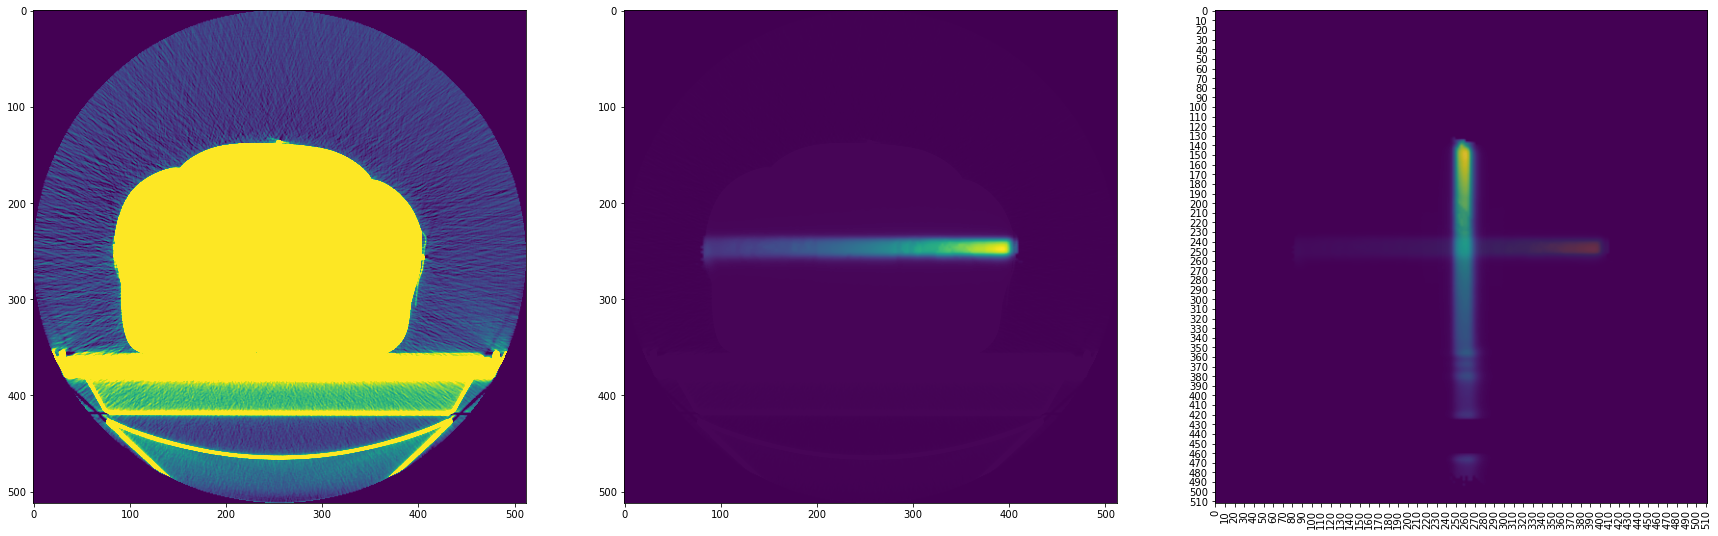

In [33]:
#for i in range(egs0.shape[2]):
i = 36
print(f"Slice #{i}")
_, ax = plt.subplots(1,3,figsize=(30,10))
ax[0].imshow(ct[:,:,i],vmin = 0, vmax = 150)
ax[2].imshow(egs90[:, :, i])
ax[2].imshow(egs0[:, :, i], alpha=50)
ax[1].imshow(ct[:, :, i],vmin = 0, vmax = 150, cmap="bone")
ax[1].imshow(egs90[:, :, i], alpha = 5)
plt.xticks(np.arange(0,512,step=10), rotation=90)
plt.yticks(np.arange(0,512,step=10))
plt.show()
plt.close()

In [24]:
iso_center = plan.BeamSequence[0].ControlPointSequence[0].IsocenterPosition
iso_center

[0.3, 31.3, -180.5]

In [25]:
sz = np.array(dose.pixel_array.shape)
pos = np.array(dose.ImagePositionPatient)
pos, iso_center, sz

(array([-323.7, -211.7, -288.5]), [0.3, 31.3, -180.5], array([109, 191, 217]))

In [26]:
vec = iso_center - pos
vec
vec/3

array([108.,  81.,  36.])

In [27]:
dos = dose.pixel_array
print(dos.shape)
dos = np.concatenate((np.zeros((109, 26, 217)), dos), axis=1)
print(dos.shape)

(109, 191, 217)
(109, 217, 217)


0


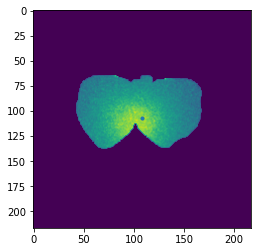

1


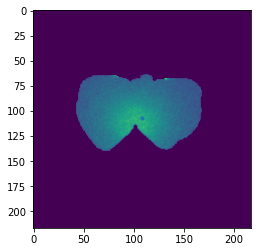

2


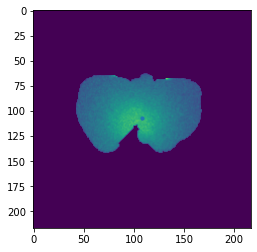

3


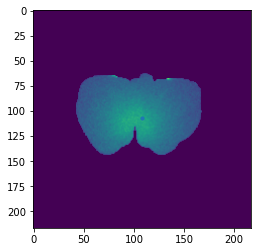

4


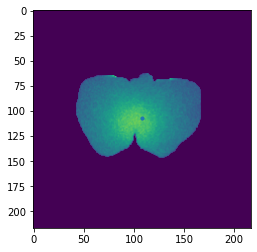

5


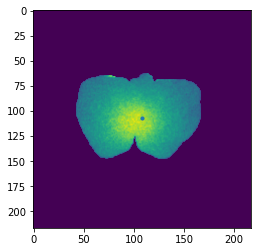

6


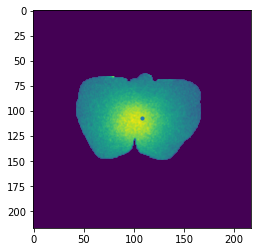

7


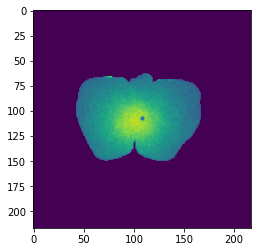

8


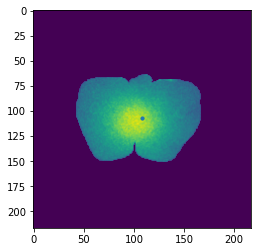

9


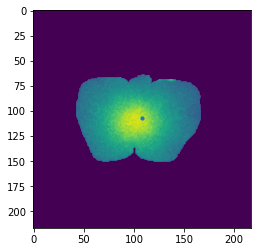

10


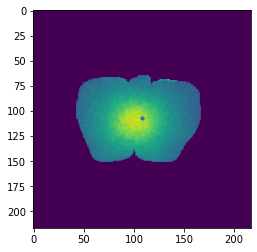

11


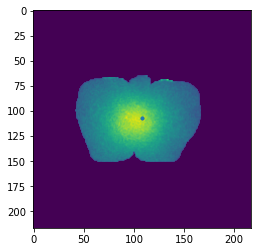

12


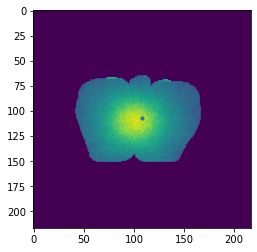

13


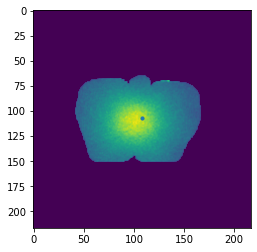

14


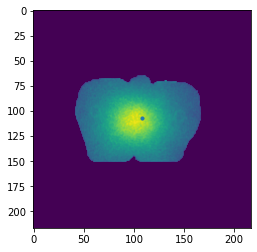

15


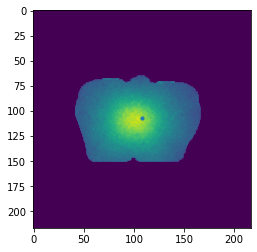

16


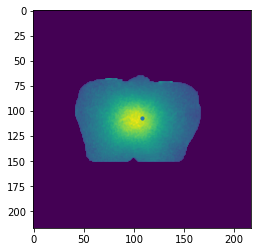

17


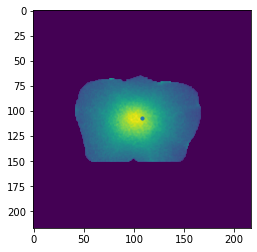

18


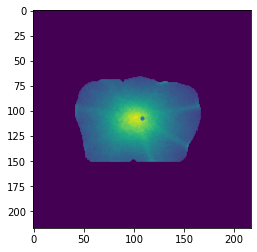

19


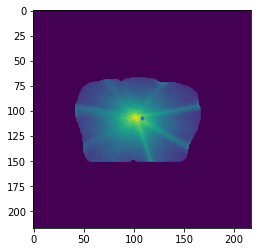

20


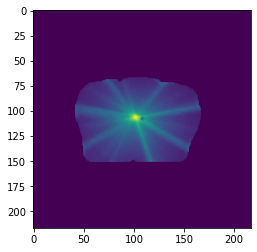

21


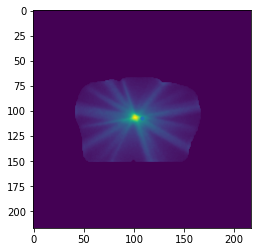

22


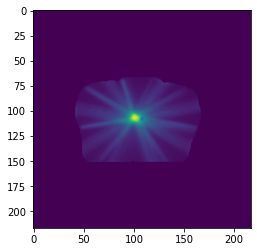

23


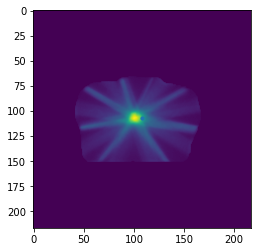

24


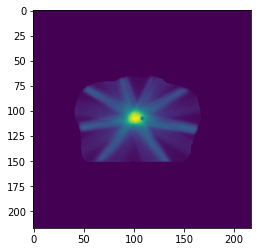

25


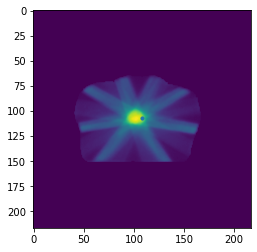

26


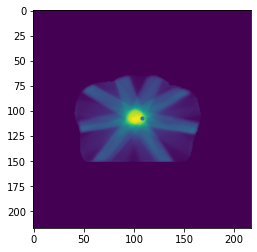

27


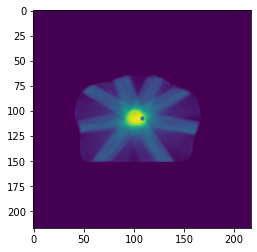

28


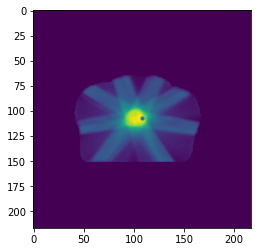

29


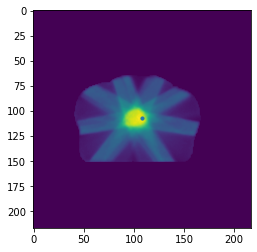

30


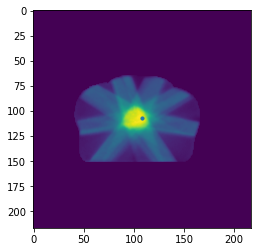

31


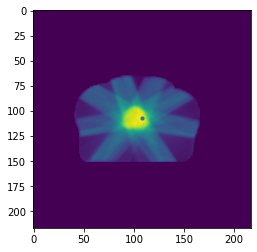

32


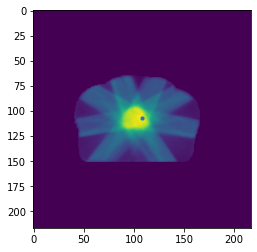

33


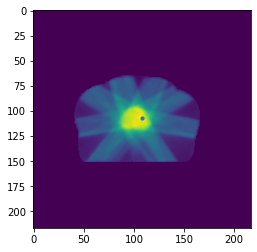

34


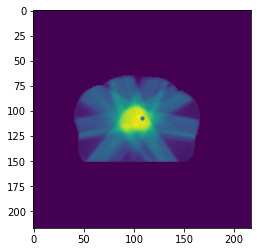

35


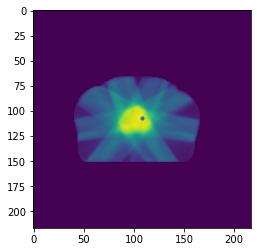

36


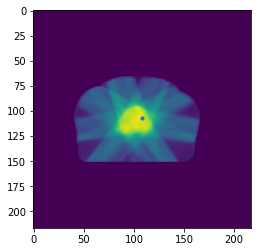

37


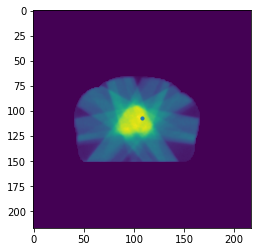

38


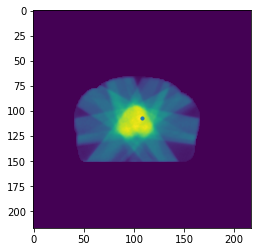

39


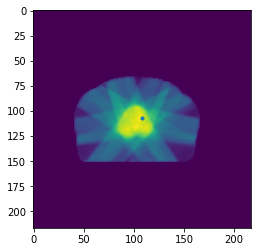

40


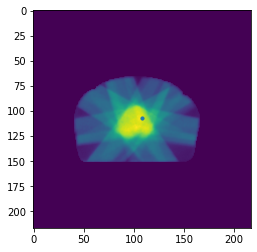

41


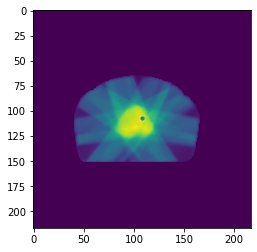

42


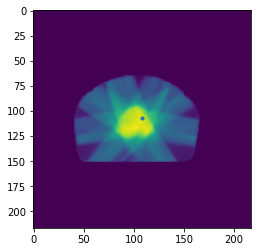

43


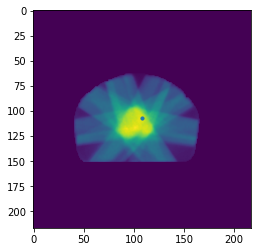

44


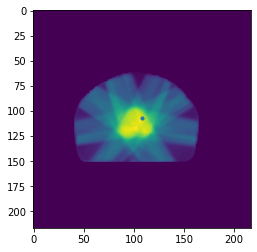

45


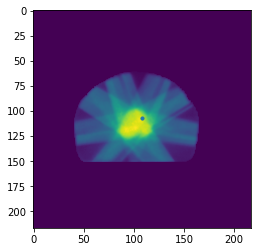

46


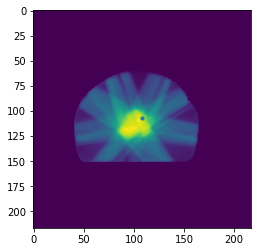

47


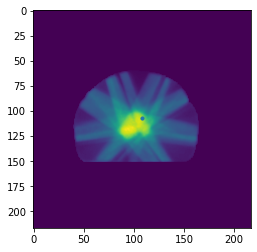

48


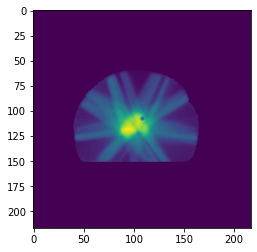

49


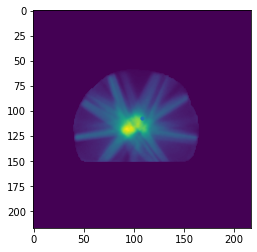

50


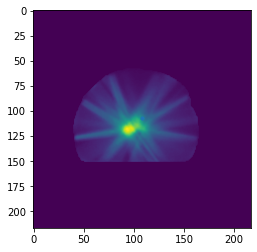

51


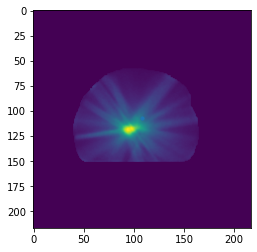

52


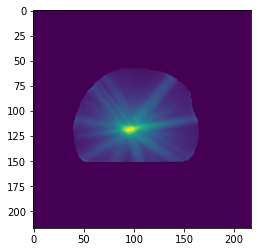

53


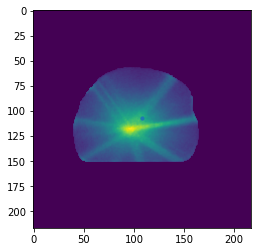

54


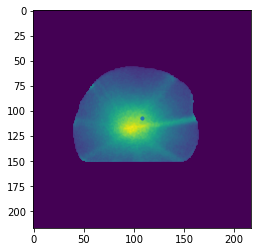

55


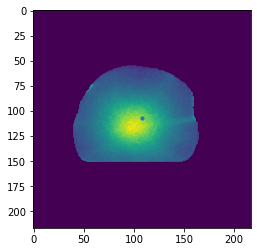

56


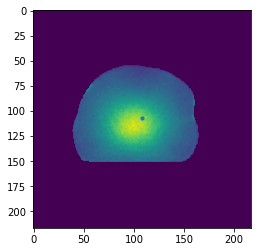

57


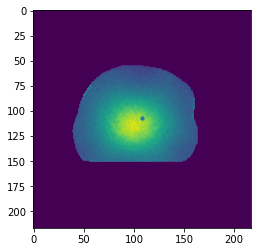

58


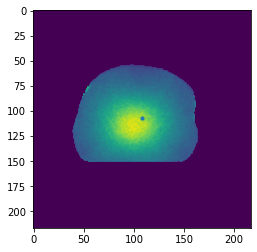

59


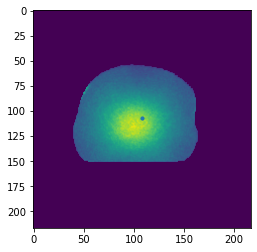

60


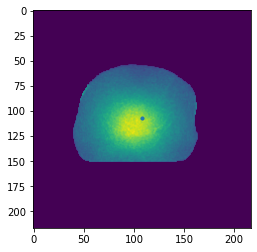

61


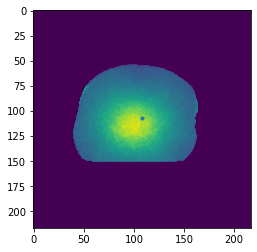

62


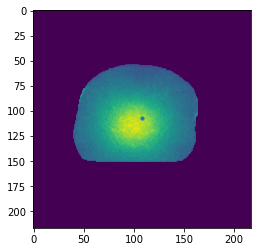

63


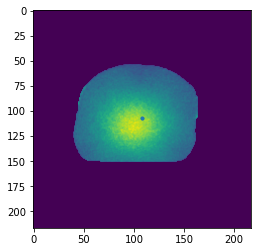

64


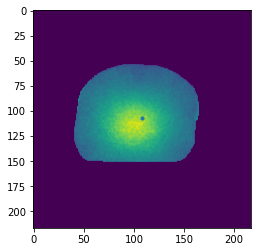

65


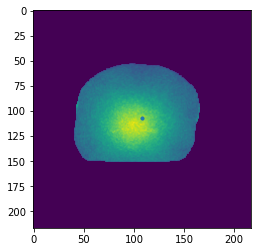

66


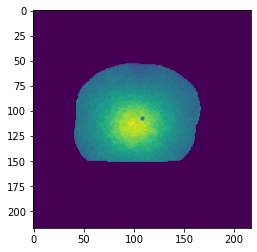

67


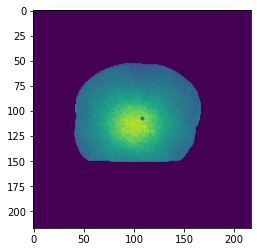

68


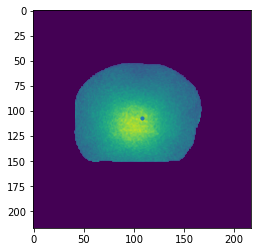

69


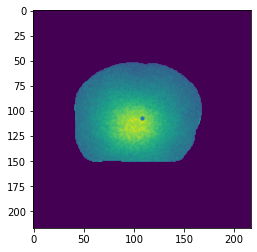

70


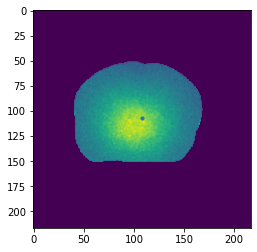

71


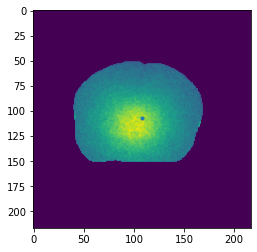

72


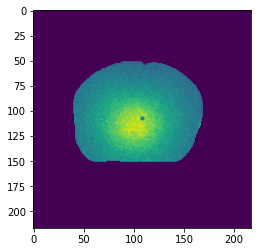

73


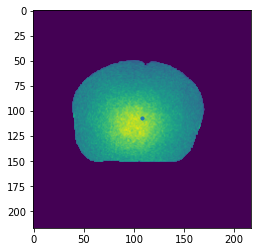

74


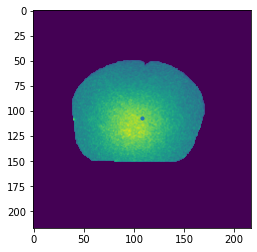

75


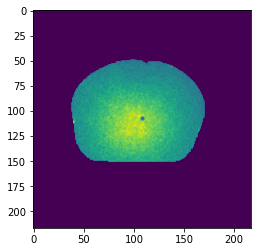

76


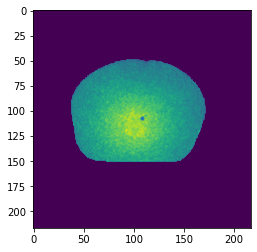

77


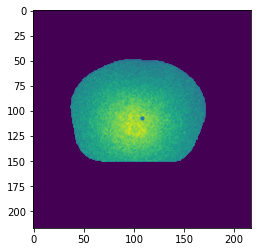

78


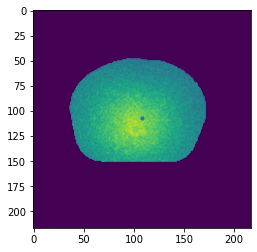

79


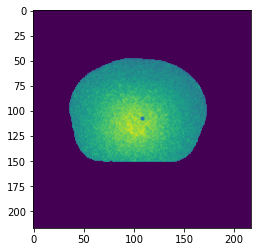

80


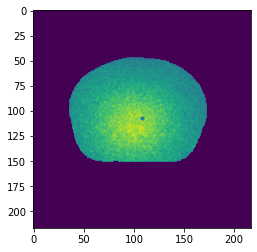

81


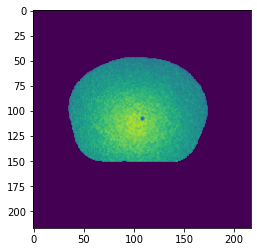

82


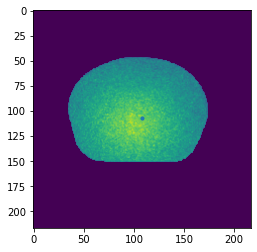

83


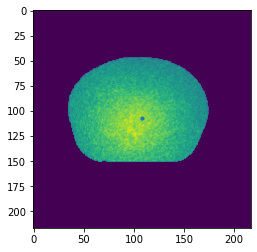

84


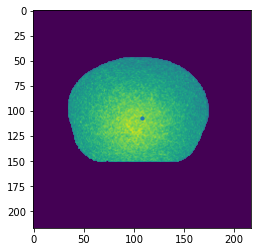

85


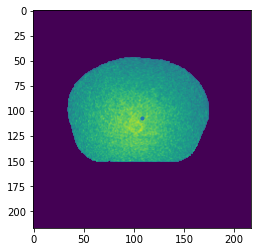

86


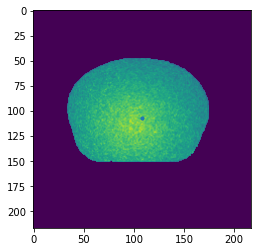

87


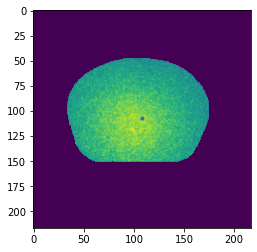

88


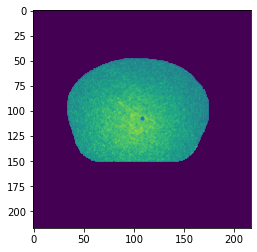

89


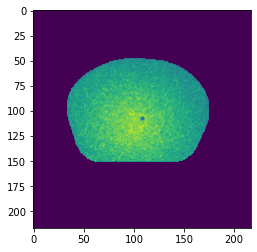

90


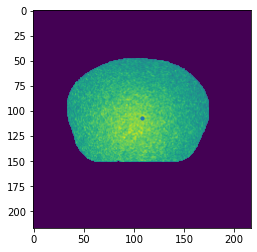

91


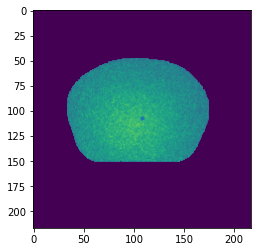

92


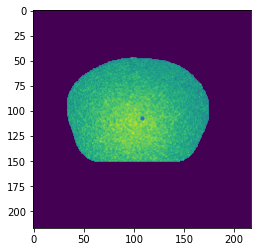

93


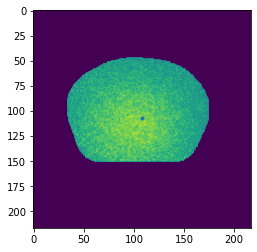

94


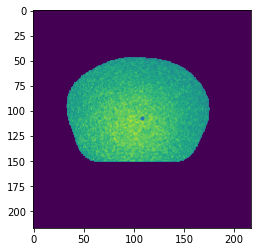

95


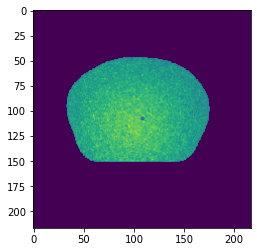

96


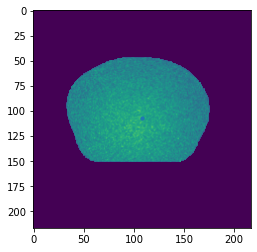

97


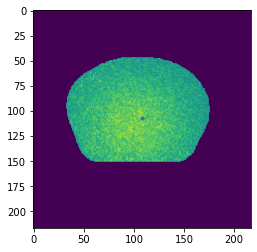

98


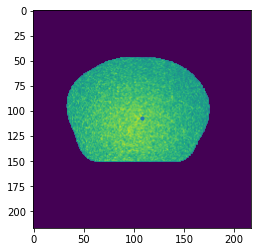

99


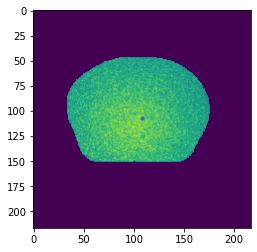

100


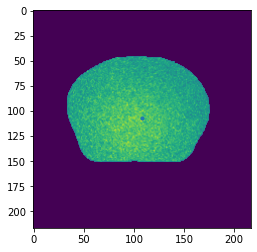

101


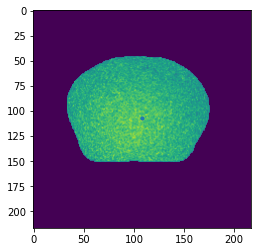

102


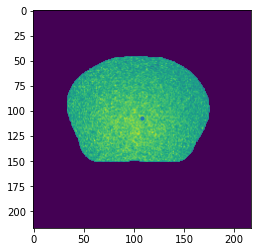

103


KeyboardInterrupt: 

In [32]:
for i in range(dose.pixel_array.shape[0]):
    print(i)
    plt.imshow(dos[i,:,:])
    plt.scatter(108,81+26, s=10)
    plt.show()
    plt.close()

108, 81+26, 36

In [ ]:
new_origin = np.array([pos[0] - 3*to_add, float(pos[1]), float(pos[2])])
new_origin

In [ ]:
for i in range(1,4):
    vec=np.roll(iso_center,i)-new_origin
    
    print(vec/vox_sz)

In [39]:


(-30.0585938 -29.9414635) / 0.3,  (-21.3398438 - 34.4413605) /0.3, (-29.1520004 - 3.84812546) / 0.3

(-200.000191, -185.93734766666668, -110.00041953333333)

In [53]:
#0.3, 31.3, -180.5
vox_sz = np.array([1.171875, 1.171875, 3])
pos = np.array([0.03--30, 3.1--21.3398438, -18.05--29.1520004])
pos

array([30.03     , 24.4398438, 11.1020004])

In [54]:
t = pos / 0.3
t[1]+=14
t

array([100.1     ,  95.466146,  37.006668])

In [55]:
t * 0.3/0.1171875

array([256.256     , 244.39333376,  94.73707008])